<a href="https://colab.research.google.com/github/aliahalotaibi73/week5_exercises/blob/main/ARIMA_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Parameter Analysis for the ARIMA model**

## Import the library


In [2]:
# To install the library
!pip install pmdarima

In [3]:
# Import the library
from pmdarima import auto_arima


# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import the library
from pmdarima import auto_arima
from pmdarima.arima import ADFTest
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


## Read dataset

In [5]:
df = pd.read_csv('/content/traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
#Test for Stationarity
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df['Vehicles'])

In [6]:
df_part = df.iloc[:300]
df_part.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


## Fit auto_arima function to AirPassengers dataset


In [7]:
stepwise_fit = auto_arima(df_part['Vehicles'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m =12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.27 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2216.673, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1654.961, Time=0.49 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2214.930, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1808.491, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1655.675, Time=1.59 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.59 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=4.25 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=6.48 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1965.965, Time=0.75 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1635.008, Time=0.89 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=1810.107, Time=0.19 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1636.402, Time=2.63 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=i

## To print the summary


In [8]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  300
Model:             SARIMAX(2, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -812.604
Date:                            Wed, 21 Aug 2024   AIC                           1633.208
Time:                                    09:15:09   BIC                           1647.860
Sample:                                         0   HQIC                          1639.080
                                            - 300                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5749      0.047     12.351      0.000       0.484       0.666
ar.L2          0.2930      0.049      5.963      0.000       0.197       0.389
ar.S.L12      -0.7293      0.030    -24.516      0.000      -0.788      -0.671
sigma2        15.9668      0.861     18.554      0.000      14.280      17.653
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               138.94
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               2.70   Skew:                             0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fit ARIMA Model

## Split data into train / test sets


In [9]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

## Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set


In [11]:
model = SARIMAX(train['Vehicles'],
                order = (2, 0, 0),
                seasonal_order =(1, 1, 0, 12))


result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Vehicles   No. Observations:                48108
Model:             SARIMAX(2, 0, 0)x(1, 1, 0, 12)   Log Likelihood             -146528.077
Date:                            Wed, 21 Aug 2024   AIC                         293064.154
Time:                                    09:15:59   BIC                         293099.278
Sample:                                         0   HQIC                        293075.177
                                          - 48108                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7435      0.002    429.178      0.000       0.740       0.747
ar.L2          0.0998      0.002     50.161      0.000       0.096       0.104
ar.S.L12      -0.7186      0.001   -740.518      0.000      -0.721      -0.717
sigma2        25.9216      0.040    653.157      0.000      25.844      25.999
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):           3616256.57
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                             1.48
Prob(H) (two-sided):                  0.00   Kurtosis:                        45.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions of ARIMA Model against the test set

In [12]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

## plot predictions and actual values



<Axes: >

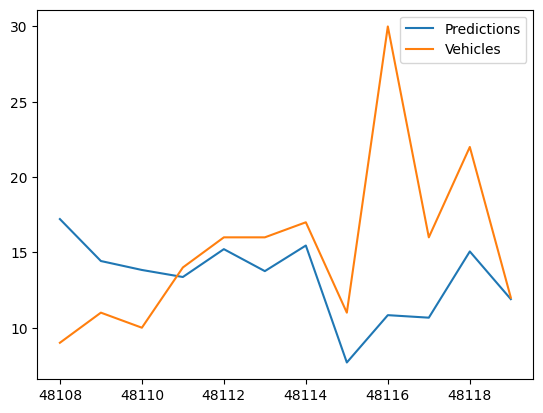

In [13]:
predictions.plot(legend = True)
test['Vehicles'].plot(legend = True)

## Evaluate the model using MSE and RMSE

In [14]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test["Vehicles"], predictions)

# Calculate mean squared error
mean_squared_error(test["Vehicles"], predictions)

46.43425456475395

#**Well Done :)**